# EDA, Feature Engineering & Regression Models

In [273]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import seaborn as sns

In [274]:
input_data = pd.read_csv("income_data.csv")

In [275]:
input_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Data Preparation & EDA

In [276]:
input_data.shape

(32561, 15)

In [277]:
col_names = {}
for i in range(15):
    col_names[input_data.columns[i]] = str.strip(input_data.columns[i])

In [278]:
input_data.rename(col_names, axis = 'columns', inplace=True)

In [279]:
input_data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [280]:
pd.notnull(input_data).all().all()

True

In [281]:
input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [282]:
input_data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [283]:
factors = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']

In [284]:
input_data['workclass'] = input_data['workclass'].str.strip()
input_data['workclass'] = input_data['workclass'].replace("?", "Unknown")

In [285]:
input_data['education'] = input_data['education'].str.strip()
input_data['education'] = input_data['education'].replace("11th", "Not-HS-Grad")
input_data['education'] = input_data['education'].replace("9th", "Not-HS-Grad")
input_data['education'] = input_data['education'].replace("7th-8th", "Not-HS-Grad")
input_data['education'] = input_data['education'].replace("5th-6th", "Not-HS-Grad")
input_data['education'] = input_data['education'].replace("10th", "Not-HS-Grad")
input_data['education'] = input_data['education'].replace("1st-4th", "Not-HS-Grad")
input_data['education'] = input_data['education'].replace("Preschool", "Not-HS-Grad")
input_data['education'] = input_data['education'].replace("12th", "Not-HS-Grad")
input_data['education'] = input_data['education'].replace("Assoc-acdm", "Assoc")
input_data['education'] = input_data['education'].replace("Assoc-voc", "Assoc")

In [286]:
input_data['native-country'] = input_data['native-country'].str.strip()
input_data['native-country'] = input_data['native-country'].replace("?", "Unknown")

In [287]:
input_data['race'] = input_data['race'].str.strip()
input_data['race'] = input_data['race'].replace("Amer-Indian-Eskimo", "Other")
input_data['race'] = input_data['race'].replace("Asian-Pac-Islander", "Other")

In [288]:
input_data['occupation'] = input_data['occupation'].str.strip()
input_data['occupation'] = input_data['occupation'].replace("?", "Unknown")

In [289]:
input_data['marital-status'] = input_data['marital-status'].str.strip()
input_data['marital-status'] = input_data['marital-status'].replace("Married-AF-spouse", "Married")
input_data['marital-status'] = input_data['marital-status'].replace("Married-civ-spouse", "Married")
input_data['marital-status'] = input_data['marital-status'].replace("Married-spouse-absent", "Married")
input_data['marital-status'] = input_data['marital-status'].replace("Separated", "Divorced")

In [290]:
input_data['native-country'] = input_data['native-country'].str.strip()
input_data['native-country'] = input_data['native-country'].replace("United-States","North America")
input_data['native-country'] = input_data['native-country'].replace("Cuba","North America")
input_data['native-country'] = input_data['native-country'].replace("Jamaica","North America")
input_data['native-country'] = input_data['native-country'].replace("India","Asia")
input_data['native-country'] = input_data['native-country'].replace("Mexico","North America")
input_data['native-country'] = input_data['native-country'].replace("Puerto-Rico","North America")
input_data['native-country'] = input_data['native-country'].replace("Honduras","North America")
input_data['native-country'] = input_data['native-country'].replace("England","Europe")
input_data['native-country'] = input_data['native-country'].replace("Canada","North America")
input_data['native-country'] = input_data['native-country'].replace("Germany","Europe")
input_data['native-country'] = input_data['native-country'].replace("Iran","Asia")
input_data['native-country'] = input_data['native-country'].replace("Philippines","Asia")
input_data['native-country'] = input_data['native-country'].replace("Italy","Europe")
input_data['native-country'] = input_data['native-country'].replace("Poland","Europe")
input_data['native-country'] = input_data['native-country'].replace("Columbia","South America")
input_data['native-country'] = input_data['native-country'].replace("Cambodia","Asia")
input_data['native-country'] = input_data['native-country'].replace("Thailand","Asia")
input_data['native-country'] = input_data['native-country'].replace("Ecuador","South America")
input_data['native-country'] = input_data['native-country'].replace("Laos","Asia")
input_data['native-country'] = input_data['native-country'].replace("Taiwan","Asia")
input_data['native-country'] = input_data['native-country'].replace("Haiti","North America")
input_data['native-country'] = input_data['native-country'].replace("Portugal","Europe")
input_data['native-country'] = input_data['native-country'].replace("Dominican-Republic","North America")
input_data['native-country'] = input_data['native-country'].replace("El-Salvador","North America")
input_data['native-country'] = input_data['native-country'].replace("France","Europe")
input_data['native-country'] = input_data['native-country'].replace("Guatemala","North America")
input_data['native-country'] = input_data['native-country'].replace("China","Asia")
input_data['native-country'] = input_data['native-country'].replace("Japan","Asia")
input_data['native-country'] = input_data['native-country'].replace("Yugoslavia","Europe")
input_data['native-country'] = input_data['native-country'].replace("Peru","South America")
input_data['native-country'] = input_data['native-country'].replace("Outlying-US(Guam-USVI-etc)","North America")
input_data['native-country'] = input_data['native-country'].replace("Scotland","Europe")
input_data['native-country'] = input_data['native-country'].replace("Trinadad&Tobago","North America")
input_data['native-country'] = input_data['native-country'].replace("Greece","Europe")
input_data['native-country'] = input_data['native-country'].replace("Nicaragua","North America")
input_data['native-country'] = input_data['native-country'].replace("Vietnam","Asia")
input_data['native-country'] = input_data['native-country'].replace("Hong","Asia")
input_data['native-country'] = input_data['native-country'].replace("Ireland","Europe")
input_data['native-country'] = input_data['native-country'].replace("Hungary","Europe")
input_data['native-country'] = input_data['native-country'].replace("Holand-Netherlands","Europe")


In [291]:
for i in range(15):
    if type(input_data.iloc[0,i]) == str:
        crosstab1 = pd.crosstab(index = input_data.iloc[:, i], columns = "count")
        print(crosstab1, "\n" ,crosstab1/crosstab1.sum()*100)

col_0             count
workclass              
Federal-gov         960
Local-gov          2093
Never-worked          7
Private           22696
Self-emp-inc       1116
Self-emp-not-inc   2541
State-gov          1298
Unknown            1836
Without-pay          14 
 col_0                 count
workclass                  
Federal-gov        2.948312
Local-gov          6.427935
Never-worked       0.021498
Private           69.703019
Self-emp-inc       3.427413
Self-emp-not-inc   7.803814
State-gov          3.986364
Unknown            5.638647
Without-pay        0.042996
col_0         count
education          
Assoc          2449
Bachelors      5355
Doctorate       413
HS-grad       10501
Masters        1723
Not-HS-Grad    4253
Prof-school     576
Some-college   7291 
 col_0             count
education              
Assoc          7.521268
Bachelors     16.446055
Doctorate      1.268389
HS-grad       32.250238
Masters        5.291607
Not-HS-Grad   13.061638
Prof-school    1.768987
Some-col

In [292]:
income_fact = input_data.copy() #Assigning levels to the values of categorical variables
mapping_levels = []
for factor in factors:
    income_fact[factor] = income_fact[factor].factorize(sort = True)[0]
    mapping_levels.append(income_fact[factor].factorize(sort = True)[1])
income_fact.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,6,77516,1,13,2,0,1,2,1,2174,0,40,2,0
1,50,5,83311,1,13,1,3,0,2,1,0,0,13,2,0
2,38,3,215646,3,9,0,5,1,2,1,0,0,40,2,0
3,53,3,234721,5,7,1,5,0,0,1,0,0,40,2,0
4,28,3,338409,1,13,1,9,5,0,0,0,0,40,2,0


In [293]:
#correlation matrix of the data
income_fact.corr()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
age,1.000000,0.059165,-0.076646,-0.066226,0.036527,-0.273197,0.012626,-0.263698,0.028592,0.088832,0.077674,0.057775,0.068756,-0.003282,0.234037
workclass,0.059165,1.000000,-0.020808,0.050434,-0.047752,0.034810,0.276992,0.002612,0.036258,0.013130,0.014337,-0.008421,-0.076452,-0.001339,-0.048620
fnlwgt,-0.076646,-0.020808,1.000000,0.010242,-0.043195,0.011355,-0.000521,0.008931,-0.089519,0.026858,0.000432,-0.010252,-0.018768,0.020683,-0.009463
education,-0.066226,0.050434,0.010242,1.000000,-0.361135,0.042383,-0.002810,0.072517,-0.028196,-0.031493,-0.014465,-0.024892,-0.099472,0.006787,-0.120439
education-num,0.036527,-0.047752,-0.043195,-0.361135,1.000000,-0.034702,0.044096,-0.094153,0.065776,0.012280,0.122630,0.079923,0.148123,-0.017465,0.335154
marital-status,-0.273197,0.034810,0.011355,0.042383,-0.034702,1.000000,0.055264,0.108665,-0.028297,-0.063333,-0.035215,-0.026049,-0.180041,0.006142,-0.152538
occupation,0.012626,0.276992,-0.000521,-0.002810,0.044096,0.055264,1.000000,-0.014625,-0.007323,0.026116,0.012350,0.004540,-0.056995,0.010846,0.010802
relationship,-0.263698,0.002612,0.008931,0.072517,-0.094153,0.108665,-0.014625,1.000000,-0.142384,-0.582454,-0.057919,-0.061062,-0.248974,0.003120,-0.250918
race,0.028592,0.036258,-0.089519,-0.028196,0.065776,-0.028297,-0.007323,-0.142384,1.000000,0.115201,0.018232,0.022587,0.053984,0.028113,0.091931
sex,0.088832,0.013130,0.026858,-0.031493,0.012280,-0.063333,0.026116,-0.582454,0.115201,1.000000,0.048480,0.045567,0.229309,0.004323,0.215980


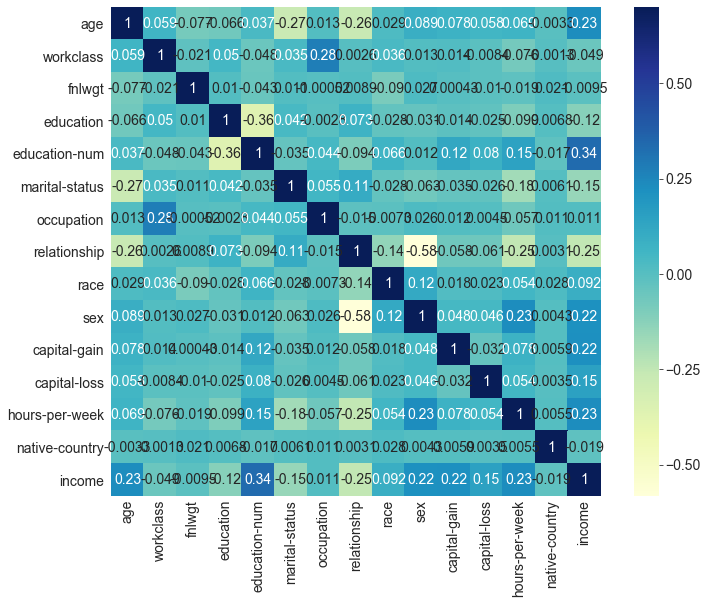

In [294]:
#creating a heatmap for the correlations for a better interpretation
heat = income_fact.corr()
plt.subplots(figsize=(12, 9))
sns.heatmap(heat, vmax=.7,annot=True,cmap="YlGnBu", square=True);

In [295]:
#checking for class imbalance
print(income_fact['income'].value_counts())

print(str(round(income_fact['income'].value_counts()[1]*100/income_fact.shape[0],2)) + '%')

0    24720
1     7841
Name: income, dtype: int64
24.08%


Text(0, 0.5, 'High Salary')

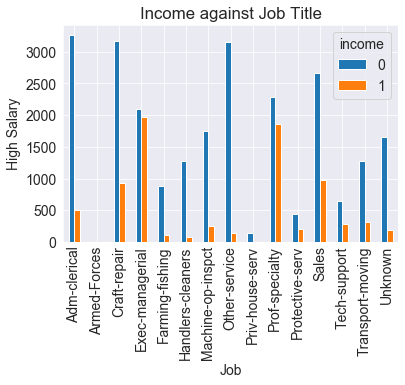

In [296]:
#determining if a variable is good predictor of income through plots
pd.crosstab(input_data['occupation'],income_fact['income']).plot(kind='bar')
plt.title('Income against Job Title')
plt.xlabel('Job')
plt.ylabel('High Salary')

Text(0, 0.5, 'High Salary')

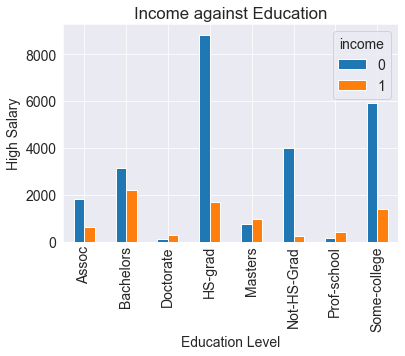

In [297]:
#determining if a variable is good predictor of income through plots
pd.crosstab(input_data['education'],income_fact['income']).plot(kind='bar')
plt.title('Income against Education')
plt.xlabel('Education Level')
plt.ylabel('High Salary')

Text(0, 0.5, 'High Salary')

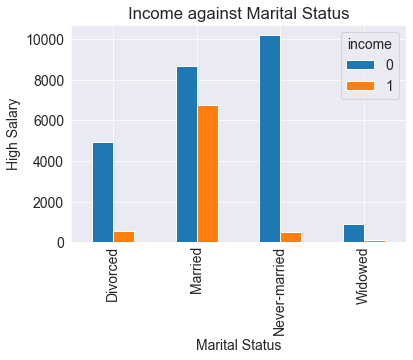

In [298]:
#determining if a variable is good predictor of income through plots
pd.crosstab(input_data['marital-status'],income_fact['income']).plot(kind='bar')
plt.title('Income against Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('High Salary')

In [299]:
income_fact['age'].nunique()

73

In [300]:
#Since plotting age will be messy (73 data points), let's split ages to bins
bins = [17, 19, 29, 39, 49, 59, 69, 120]
labels = ['17-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70+']
income_fact['age_range'] = pd.cut(income_fact.age, bins, labels = labels,include_lowest = True)

Text(0, 0.5, 'High Salary')

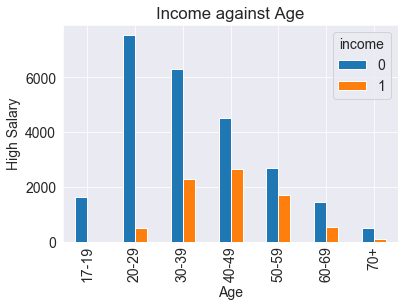

In [301]:
#determining if a variable is good predictor of income through plots
pd.crosstab(income_fact['age_range'],income_fact['income']).plot(kind='bar')
plt.title('Income against Age')
plt.xlabel('Age')
plt.ylabel('High Salary')

Text(0, 0.5, 'High Salary')

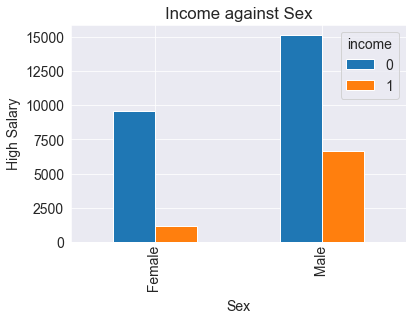

In [302]:
#determining if a variable is good predictor of income through plots
pd.crosstab(input_data['sex'],income_fact['income']).plot(kind='bar')
plt.title('Income against Sex')
plt.xlabel('Sex')
plt.ylabel('High Salary')

In [303]:
income_fact['hours-per-week'].max()

99

In [304]:
#similar to ages, hours per week consist of several data points, so let's divide this category into bins
bins = [1, 19, 29, 39, 49, 59, 69, 79, 120]
labels = ['1-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']
income_fact['hours_bins'] = pd.cut(income_fact['hours-per-week'], bins, labels = labels,include_lowest = True)

Text(0, 0.5, 'High Salary')

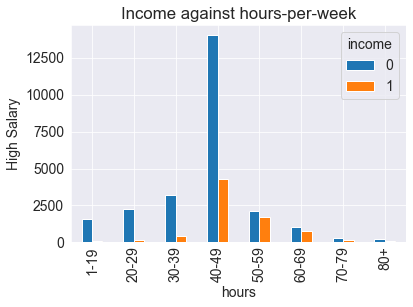

In [305]:
pd.crosstab(income_fact['hours_bins'],income_fact['income']).plot(kind='bar')
plt.title('Income against hours-per-week')
plt.xlabel('hours')
plt.ylabel('High Salary')

Text(0, 0.5, 'High Salary')

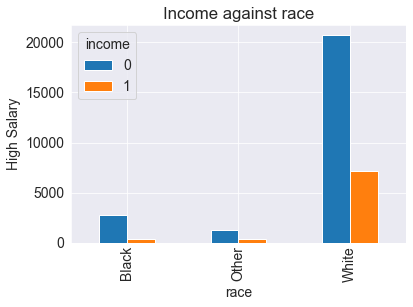

In [306]:
pd.crosstab(input_data['race'],income_fact['income']).plot(kind='bar')
plt.title('Income against race')
plt.xlabel('race')
plt.ylabel('High Salary')

Text(0, 0.5, 'High Salary')

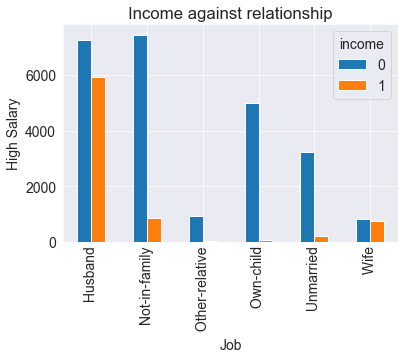

In [307]:
pd.crosstab(input_data['relationship'],income_fact['income']).plot(kind='bar')
plt.title('Income against relationship')
plt.xlabel('Job')
plt.ylabel('High Salary')

Text(0, 0.5, 'frequency')

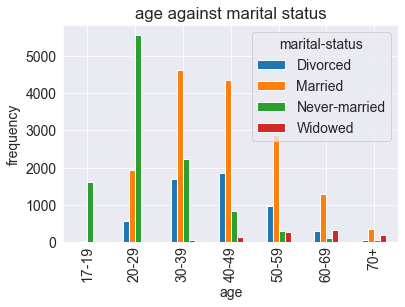

In [308]:
pd.crosstab(income_fact['age_range'],input_data['marital-status']).plot(kind='bar')
plt.title('age against marital status')
plt.xlabel('age')
plt.ylabel('frequency')

Text(0, 0.5, 'frequency')

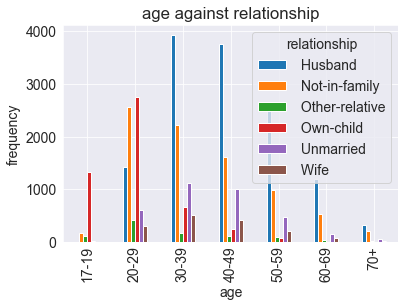

In [309]:
pd.crosstab(income_fact['age_range'],input_data['relationship']).plot(kind='bar')
plt.title('age against relationship')
plt.xlabel('age')
plt.ylabel('frequency')

Text(0, 0.5, 'frequency')

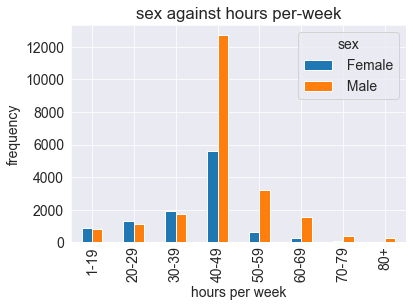

In [310]:
pd.crosstab(income_fact['hours_bins'],input_data['sex']).plot(kind='bar')
plt.title('sex against hours per-week')
plt.xlabel('hours per week')
plt.ylabel('frequency')

Text(0, 0.5, 'frequency')

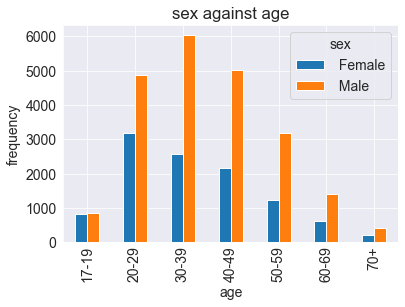

In [311]:
pd.crosstab(income_fact['age_range'],input_data['sex']).plot(kind='bar')
plt.title('sex against age')
plt.xlabel('age')
plt.ylabel('frequency')

Text(0, 0.5, 'frequency')

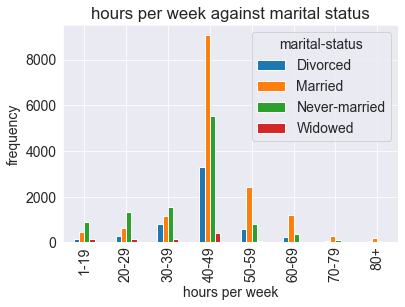

In [312]:
pd.crosstab(income_fact['hours_bins'],input_data['marital-status']).plot(kind='bar')
plt.title('hours per week against marital status')
plt.xlabel('hours per week')
plt.ylabel('frequency')

Text(0, 0.5, 'frequency')

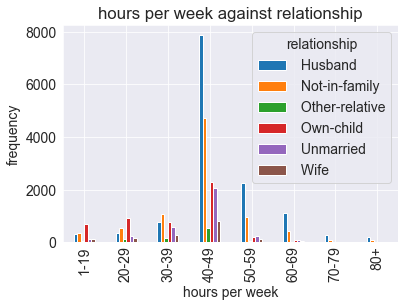

In [313]:
pd.crosstab(income_fact['hours_bins'],input_data['relationship']).plot(kind='bar')
plt.title('hours per week against relationship')
plt.xlabel('hours per week')
plt.ylabel('frequency')

In [314]:
data = pd.get_dummies(input_data, columns = factors)
data.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,sex_ Female,sex_ Male,native-country_Asia,native-country_Europe,native-country_North America,native-country_South,native-country_South America,native-country_Unknown,income_ <=50K,income_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
2,38,215646,9,0,0,40,0,0,0,1,...,0,1,0,0,1,0,0,0,1,0
3,53,234721,7,0,0,40,0,0,0,1,...,0,1,0,0,1,0,0,0,1,0
4,28,338409,13,0,0,40,0,0,0,1,...,1,0,0,0,1,0,0,0,1,0


In [315]:
data.columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Unknown', 'workclass_Without-pay', 'education_Assoc',
       'education_Bachelors', 'education_Doctorate', 'education_HS-grad',
       'education_Masters', 'education_Not-HS-Grad', 'education_Prof-school',
       'education_Some-college', 'marital-status_Divorced',
       'marital-status_Married', 'marital-status_Never-married',
       'marital-status_Widowed', 'occupation_Adm-clerical',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'occupation_Prof-specialty', 'occu

# Logit Regression
## on Income
### Question 4

In [316]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

In [317]:
corrdf=data.corr()
corrdf #check on correlations

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,sex_ Female,sex_ Male,native-country_Asia,native-country_Europe,native-country_North America,native-country_South,native-country_South America,native-country_Unknown,income_ <=50K,income_ >50K
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.051227,0.060901,-0.019362,-0.198388,...,-0.088832,0.088832,-0.005726,0.028225,-0.011498,0.000613,-0.003396,0.001425,-0.234037,0.234037
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768,-0.007525,-0.002828,0.005031,0.042907,...,-0.026858,0.026858,-0.018720,-0.013515,0.012699,-0.012365,0.022300,0.004506,0.009463,-0.009463
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123,0.060518,0.097941,-0.015117,-0.118484,...,-0.012280,0.012280,0.064018,0.005229,-0.055230,0.016046,-0.016195,0.027184,-0.335154,0.335154
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409,-0.005768,-0.007007,-0.002140,-0.038701,...,-0.048480,0.048480,0.008444,-0.006198,-0.008538,0.005323,-0.006914,0.013326,-0.223329,0.223329
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256,0.010798,0.014668,-0.003177,-0.027460,...,-0.045567,0.045567,0.008481,-0.005466,-0.007852,0.010114,-0.008691,0.010375,-0.150526,0.150526
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000,0.013293,0.011576,-0.014262,-0.020928,...,-0.229309,0.229309,-0.001445,0.010349,-0.010039,0.007938,-0.010829,0.011760,-0.229689,0.229689
workclass_Federal-gov,0.051227,-0.007525,0.060518,-0.005768,0.010798,0.013293,1.000000,-0.045682,-0.002556,-0.264369,...,-0.000989,0.000989,0.005389,-0.003416,0.000891,-0.004983,-0.004469,-0.000258,-0.059372,0.059372
workclass_Local-gov,0.060901,-0.002828,0.097941,-0.007007,0.014668,0.011576,-0.045682,1.000000,-0.003843,-0.397547,...,0.037966,-0.037966,-0.015982,-0.008472,0.025626,-0.013007,-0.011639,-0.010836,-0.033091,0.033091
workclass_Never-worked,-0.019362,0.005031,-0.015117,-0.002140,-0.003177,-0.014262,-0.002556,-0.003843,1.000000,-0.022242,...,-0.001405,0.001405,-0.002127,-0.001870,0.003724,-0.000728,-0.000884,-0.001980,0.008259,-0.008259
workclass_Private,-0.198388,0.042907,-0.118484,-0.038701,-0.027460,-0.020928,-0.264369,-0.397547,-0.022242,1.000000,...,0.034699,-0.034699,0.006253,0.005245,-0.008336,-0.017229,0.017517,0.001830,0.078528,-0.078528


In [318]:
corrdf['income_ >50K'].sort_values(ascending=False)

income_ >50K                    1.000000
marital-status_Married          0.434944
relationship_ Husband           0.401035
education-num                   0.335154
age                             0.234037
hours-per-week                  0.229689
capital-gain                    0.223329
sex_ Male                       0.215980
occupation_Exec-managerial      0.214861
occupation_Prof-specialty       0.185866
education_Bachelors             0.180485
education_Masters               0.174570
education_Prof-school           0.154907
capital-loss                    0.150526
workclass_Self-emp-inc          0.139467
education_Doctorate             0.132572
relationship_ Wife              0.123264
race_White                      0.085224
workclass_Federal-gov           0.059372
workclass_Local-gov             0.033091
workclass_Self-emp-not-inc      0.030019
occupation_Protective-serv      0.028118
occupation_Tech-support         0.025696
occupation_Sales                0.023688
native-country_A

In [319]:
keepers = ['income_ >50K', 'age', 'education-num', 
       'marital-status_Married', 'marital-status_Never-married',
       'marital-status_Widowed', 'capital-gain', 
            'relationship_ Husband', 'relationship_ Not-in-family',
       'relationship_ Other-relative', 'relationship_ Own-child',
       'relationship_ Unmarried',
           'hours-per-week']

In [320]:
data0=data[keepers]
data0.info() #select the high correlation variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
income_ >50K                    32561 non-null uint8
age                             32561 non-null int64
education-num                   32561 non-null int64
marital-status_Married          32561 non-null uint8
marital-status_Never-married    32561 non-null uint8
marital-status_Widowed          32561 non-null uint8
capital-gain                    32561 non-null int64
relationship_ Husband           32561 non-null uint8
relationship_ Not-in-family     32561 non-null uint8
relationship_ Other-relative    32561 non-null uint8
relationship_ Own-child         32561 non-null uint8
relationship_ Unmarried         32561 non-null uint8
hours-per-week                  32561 non-null int64
dtypes: int64(4), uint8(9)
memory usage: 1.3 MB


In [321]:
X0 = data0.loc[:, data0.columns != 'income_ >50K']
Y0 = data0.loc[:, data0.columns == 'income_ >50K']

In [322]:
X0_train, X0_test, Y0_train, Y0_test = train_test_split(X0, Y0, test_size=0.3, random_state=1) 

In [323]:
mod0 = sm.Logit(Y0_train,X0_train)
fit0 = mod0.fit()
print(fit0.summary2())#model summary

Optimization terminated successfully.
         Current function value: inf
         Iterations 9


C:\Users\vardh\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1789: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\vardh\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


                               Results: Logit
Model:                    Logit                 Pseudo R-squared:      inf   
Dependent Variable:       income_ >50K          AIC:                   inf   
Date:                     2020-01-16 23:44      BIC:                   inf   
No. Observations:         22792                 Log-Likelihood:        -inf  
Df Model:                 11                    LL-Null:               0.0000
Df Residuals:             22780                 LLR p-value:           1.0000
Converged:                1.0000                Scale:                 1.0000
No. Iterations:           9.0000                                             
-----------------------------------------------------------------------------
                              Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------------------
age                           0.0161   0.0017   9.2554 0.0000  0.0127  0.0195
education-num     

C:\Users\vardh\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [324]:
logreg = LogisticRegression()
logreg.fit(X0_train, Y0_train) #model fitting

C:\Users\vardh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\vardh\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [325]:
Y0_pred = logreg.predict(X0_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X0_test, Y0_test)))

Accuracy of logistic regression classifier on test set: 0.84


In [326]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y0_test, Y0_pred)
print(confusion_matrix) #correction prediction(6989+992), incorrect prediction(561+1227)

[[6989  561]
 [ 992 1227]]


In [327]:
from sklearn.metrics import classification_report
print(classification_report(Y0_test, Y0_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      7550
           1       0.69      0.55      0.61      2219

    accuracy                           0.84      9769
   macro avg       0.78      0.74      0.76      9769
weighted avg       0.83      0.84      0.83      9769



In [328]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
plt.rc("font", size=14)

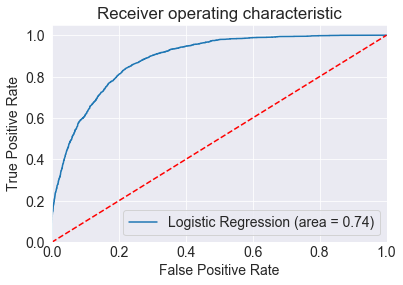

In [329]:
logit_roc_auc = roc_auc_score(Y0_test, logreg.predict(X0_test))
fpr, tpr, thresholds = roc_curve(Y0_test, logreg.predict_proba(X0_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() #ROC curve stays above average line. the model is good.

# Linear Regression
## Dependent is hours-per-week
### Full Model

In [330]:
drop_col = ["hours-per-week", "fnlwgt", "workclass_Federal-gov", "education_Assoc", "marital-status_Divorced", 
            "occupation_Adm-clerical", "relationship_ Husband", "race_Black", "sex_ Female", "native-country_Asia",
            "income_ <=50K"]

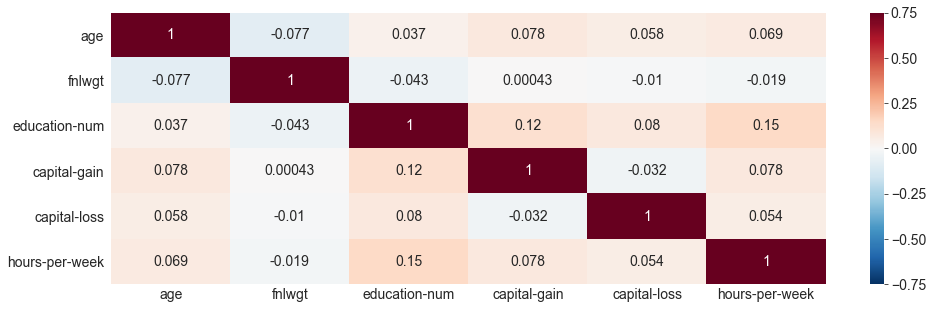

In [331]:
# Checking for collienarity
correlation = input_data.corr()
plt.figure(figsize=(16, 5))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-0.75, vmax=0.75, cmap="RdBu_r")

In [332]:
X1 = data.drop(drop_col, axis=1)
Y1 = input_data['hours-per-week']

In [333]:
X1 = sm.add_constant(X1)
mod1 = sm.OLS(Y1,X1)
fit1 = mod1.fit()
p_values1 = fit1.summary2()
p_values1

C:\Users\vardh\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Ordinary least squares
==============================================================================
Model:                  OLS                 Adj. R-squared:        0.199      
Dependent Variable:     hours-per-week      AIC:                   248906.1767
Date:                   2020-01-16 23:44    BIC:                   249325.7203
No. Observations:       32561               Log-Likelihood:        -1.2440e+05
Df Model:               49                  F-statistic:           166.2      
Df Residuals:           32511               Prob (F-statistic):    0.00       
R-squared:              0.200               Scale:                 122.11     
------------------------------------------------------------------------------
                              Coef.  Std.Err.    t     P>|t|   [0.025   0.975]
------------------------------------------------------------------------------
const                        50.0421   1.5011  33.3371 0.0000  47.0999 52.9843
age                          -0.1046   0.0059 -17.8647 0.0000  -0.1160 -0.0931
education-num                -0.6269   0.0994  -6.3076 0.0000  -0.8217 -0.4321
capital-gain                  0.0000   0.0000   3.3636 0.0008   0.0000  0.0000
capital-loss                  0.0003   0.0002   2.0862 0.0370   0.0000  0.0006
workclass_Local-gov           0.1407   0.4410   0.3190 0.7497  -0.7237  1.0051
workclass_Never-worked       -2.7096   2.7907  -0.9709 0.3316  -8.1796  2.7603
workclass_Private             0.0780   0.3731   0.2089 0.8345  -0.6533  0.8092
workclass_Self-emp-inc        5.0665   0.4984  10.1666 0.0000   4.0897  6.0433
workclass_Self-emp-not-inc    1.7884   0.4334   4.1267 0.0000   0.9390  2.6378
workclass_State-gov          -1.9660   0.4764  -4.1271 0.0000  -2.8997 -1.0323
workclass_Unknown            -0.9693   1.4092  -0.6878 0.4916  -3.7314  1.7929
workclass_Without-pay        -5.8681   2.9825  -1.9675 0.0491 -11.7138 -0.0224
education_Bachelors           1.3922   0.3173   4.3874 0.0000   0.7703  2.0142
education_Doctorate           6.8767   0.7676   8.9590 0.0000   5.3723  8.3812
education_HS-grad            -1.6564   0.3485  -4.7526 0.0000  -2.3395 -0.9732
education_Masters             2.7936   0.4472   6.2472 0.0000   1.9171  3.6701
education_Not-HS-Grad        -6.1306   0.6447  -9.5099 0.0000  -7.3942 -4.8671
education_Prof-school         5.3798   0.6515   8.2576 0.0000   4.1029  6.6568
education_Some-college       -2.0065   0.2982  -6.7292 0.0000  -2.5910 -1.4221
marital-status_Married       -0.6596   0.4692  -1.4056 0.1599  -1.5793  0.2602
marital-status_Never-married -2.9414   0.2162 -13.6031 0.0000  -3.3652 -2.5176
marital-status_Widowed       -4.9633   0.3958 -12.5397 0.0000  -5.7391 -4.1875
occupation_Armed-Forces       0.7329   3.7064   0.1977 0.8433  -6.5317  7.9975
occupation_Craft-repair       1.4515   0.2717   5.3428 0.0000   0.9190  1.9840
occupation_Exec-managerial    3.2084   0.2668  12.0268 0.0000   2.6855  3.7313
occupation_Farming-fishing    6.8074   0.4209  16.1747 0.0000   5.9825  7.6324
occupation_Handlers-cleaners -0.3662   0.3659  -1.0009 0.3169  -1.0833  0.3509
occupation_Machine-op-inspct  1.5770   0.3197   4.9323 0.0000   0.9503  2.2037
occupation_Other-service     -2.2816   0.2707  -8.4286 0.0000  -2.8122 -1.7510
occupation_Priv-house-serv   -2.5449   0.9318  -2.7312 0.0063  -4.3713 -0.7186
occupation_Prof-specialty     0.6576   0.2812   2.3388 0.0194   0.1065  1.2087
occupation_Protective-serv    2.4848   0.4918   5.0525 0.0000   1.5208  3.4487
occupation_Sales              0.9818   0.2672   3.6749 0.0002   0.4581  1.5054
occupation_Tech-support      -0.4668   0.4099  -1.1388 0.2548  -1.2703  0.3367
occupation_Transport-moving   4.3922   0.3479  12.6251 0.0000   3.7103  5.0740
occupation_Unknown           -3.6789   1.4202  -2.5904 0.0096  -6.4625 -0.8953
relationship_ Not-in-family   0.8906   0.4703   1.8937 0.0583  -0.0312  1.8124
relationship_ Other-relat

### Reduced Model

In [334]:
import re
col = []
for i in range(len(X1.columns)):
    res = re.search("race.*",X1.columns[i])
    if res != None:
        col.append(str(res[0]))

In [335]:
drop_col2 = ["hours-per-week", "fnlwgt", "capital-gain", "education-num", "capital-loss", "workclass_Federal-gov", "education_Assoc", "marital-status_Divorced",
             "occupation_Adm-clerical", "relationship_ Husband", "race_Black", "sex_ Female", "native-country_Asia", 
             "native-country_Europe", "native-country_North America", "native-country_South", "native-country_South America",
             "native-country_Unknown", "income_ <=50K"]
for i in range(len(col)):
    drop_col2.append(col[i])

In [336]:
X2 = sm.add_constant(data.drop(drop_col2, axis=1))
Y2 = input_data['hours-per-week']

In [337]:
mod2 = sm.OLS(Y2,X2)
fit2 = mod2.fit()
p_values2 = fit2.summary2()
p_values2

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Ordinary least squares
==============================================================================
Model:                  OLS                 Adj. R-squared:        0.198      
Dependent Variable:     hours-per-week      AIC:                   248951.3441
Date:                   2020-01-16 23:44    BIC:                   249286.9790
No. Observations:       32561               Log-Likelihood:        -1.2444e+05
Df Model:               39                  F-statistic:           206.8      
Df Residuals:           32521               Prob (F-statistic):    0.00       
R-squared:              0.199               Scale:                 122.31     
------------------------------------------------------------------------------
                              Coef.  Std.Err.    t     P>|t|   [0.025   0.975]
------------------------------------------------------------------------------
const                        43.1087   0.7183  60.0151 0.0000  41.7008 44.5165
age                          -0.1001   0.0058 -17.1915 0.0000  -0.1115 -0.0887
workclass_Local-gov           0.1657   0.4411   0.3757 0.7071  -0.6988  1.0302
workclass_Never-worked       -2.6412   2.7930  -0.9456 0.3443  -8.1155  2.8332
workclass_Private             0.1190   0.3726   0.3194 0.7494  -0.6113  0.8493
workclass_Self-emp-inc        5.1738   0.4971  10.4088 0.0000   4.1995  6.1480
workclass_Self-emp-not-inc    1.8421   0.4325   4.2594 0.0000   0.9945  2.6898
workclass_State-gov          -1.9634   0.4765  -4.1202 0.0000  -2.8974 -1.0294
workclass_Unknown            -0.9682   1.4103  -0.6865 0.4924  -3.7324  1.7961
workclass_Without-pay        -5.9383   2.9847  -1.9896 0.0466 -11.7884 -0.0882
education_Bachelors           0.4379   0.2771   1.5802 0.1141  -0.1052  0.9811
education_Doctorate           4.0925   0.6152   6.6526 0.0000   2.8867  5.2982
education_HS-grad            -0.1379   0.2532  -0.5446 0.5860  -0.6342  0.3584
education_Masters             1.2098   0.3663   3.3026 0.0010   0.4918  1.9278
education_Not-HS-Grad        -2.4960   0.2918  -8.5552 0.0000  -3.0679 -1.9242
education_Prof-school         3.3661   0.5416   6.2154 0.0000   2.3046  4.4276
education_Some-college       -1.0872   0.2606  -4.1722 0.0000  -1.5979 -0.5764
marital-status_Married       -0.5512   0.4675  -1.1792 0.2383  -1.4675  0.3650
marital-status_Never-married -2.9027   0.2162 -13.4290 0.0000  -3.3264 -2.4790
marital-status_Widowed       -4.9354   0.3960 -12.4633 0.0000  -5.7115 -4.1592
occupation_Armed-Forces       0.6714   3.7092   0.1810 0.8564  -6.5989  7.9416
occupation_Craft-repair       1.4779   0.2718   5.4375 0.0000   0.9452  2.0106
occupation_Exec-managerial    3.2291   0.2669  12.1003 0.0000   2.7061  3.7522
occupation_Farming-fishing    6.9489   0.4202  16.5366 0.0000   6.1253  7.7725
occupation_Handlers-cleaners -0.3096   0.3659  -0.8461 0.3975  -1.0269  0.4076
occupation_Machine-op-inspct  1.6716   0.3194   5.2339 0.0000   1.0456  2.2976
occupation_Other-service     -2.2289   0.2705  -8.2398 0.0000  -2.7591 -1.6987
occupation_Priv-house-serv   -2.2020   0.9309  -2.3655 0.0180  -4.0265 -0.3775
occupation_Prof-specialty     0.6785   0.2813   2.4121 0.0159   0.1272  1.2298
occupation_Protective-serv    2.5103   0.4920   5.1021 0.0000   1.5460  3.4747
occupation_Sales              0.9801   0.2673   3.6672 0.0002   0.4562  1.5039
occupation_Tech-support      -0.4539   0.4102  -1.1066 0.2685  -1.2579  0.3501
occupation_Transport-moving   4.3984   0.3480  12.6404 0.0000   3.7164  5.0804
occupation_Unknown           -3.6093   1.4213  -2.5394 0.0111  -6.3952 -0.8235
relationship_ Not-in-family   0.9767   0.4692   2.0818 0.0374   0.0571  1.8963
relationship_ Other-relative -1.7894   0.5350  -3.3445 0.0008  -2.8381 -0.7407
relationship_ Own-child      -5.5986   0.4886 -11.4581 0.0000  -6.5563 -4.6409
relationship_ Unmarried       0.5119   0.5015   1.0209 0.3073  -0.4710  1.4948
relationship_ Wife       

#### Reduced model doesn't seem to improve quality of the model.

## Interaction effects

In [338]:
data1 = input_data.copy()
col_names = {}
for i in range(15):
    col_names[data1.columns[i]] = data1.columns[i]
    if data1.columns[i] == "hours-per-week":
        col_names[data1.columns[i]] = "weeklyhours"
    if data1.columns[i] == "marital-status":
        col_names[data1.columns[i]] = "maritalstatus"    
data1.rename(col_names, axis = 'columns', inplace=True)
data1.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'maritalstatus', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'weeklyhours', 'native-country',
       'income'],
      dtype='object')

In [339]:
from patsy import dmatrices

In [340]:
Y_intr, X_intr = dmatrices('weeklyhours ~ age + workclass + education + maritalstatus + occupation + relationship + sex + income + sex:education + workclass:education', data=data1, return_type='dataframe')

In [341]:
mod2 = sm.OLS(Y_intr,X_intr)
fit2 = mod2.fit()
p_values2 = fit2.summary2()
p_values2

C:\Users\vardh\Anaconda3\lib\site-packages\statsmodels\base\model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\vardh\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\vardh\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\vardh\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                     Results: Ordinary least squares
==========================================================================================================
Model:                            OLS                          Adj. R-squared:                 0.203      
Dependent Variable:               weeklyhours                  AIC:                            248785.3972
Date:                             2020-01-16 23:44             BIC:                            249574.1390
No. Observations:                 32561                        Log-Likelihood:                 -1.2430e+05
Df Model:                         93                           F-statistic:                    90.24      
Df Residuals:                     32467                        Prob (F-statistic):             0.00       
R-squared:                        0.205                        Scale:                          121.49     
----------------------------------------------------------------------------------------------------------
                                                         Coef.   Std.Err.    t     P>|t|   [0.025   0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                                42.9671   1.3193  32.5693 0.0000  40.3814 45.5529
workclass[T.Local-gov]                                   -0.1353   1.4206  -0.0952 0.9241  -2.9197  2.6492
workclass[T.Never-worked]                                -0.6645   2.7214  -0.2442 0.8071  -5.9986  4.6696
workclass[T.Private]                                      0.5168   1.1748   0.4399 0.6600  -1.7858  2.8195
workclass[T.Self-emp-inc]                                 5.8595   1.7283   3.3903 0.0007   2.4720  9.2470
workclass[T.Self-emp-not-inc]                             3.4688   1.4139   2.4534 0.0142   0.6975  6.2401
workclass[T.State-gov]                                   -1.3291   1.6463  -0.8073 0.4195  -4.5560  1.8978
workclass[T.Unknown]                                     -3.0635   1.6733  -1.8308 0.0671  -6.3431  0.2162
workclass[T.Without-pay]                                  4.5743  11.0894   0.4125 0.6800 -17.1612 26.3099
education[T.Bachelors]                                    1.2492   1.4303   0.8734 0.3825  -1.5542  4.0526
education[T.Doctorate]                                   10.8705   3.1062   3.4996 0.0005   4.7822 16.9588
education[T.HS-grad]                                     -0.1687   1.3775  -0.1225 0.9025  -2.8686  2.5312
education[T.Masters]                                      0.6180   1.8551   0.3331 0.7390  -3.0180  4.2540
education[T.Not-HS-Grad]                                 -3.9001   2.4812  -1.5718 0.1160  -8.7635  0.9632
education[T.Prof-school]                                  8.0275   2.5703   3.1232 0.0018   2.9896 13.0653
education[T.Some-college]                                -1.0152   1.3844  -0.7333 0.4634  -3.7287  1.6983
maritalstatus[T.Married]                                 -0.4652   0.4667  -0.9968 0.3189  -1.3799  0.4495
maritalstatus[T.Never-married]                           -2.9153   0.2160 -13.4997 0.0000  -3.3386 -2.4920
maritalstatus[T.Widowed]                                 -4.8992   0.3959 -12.3737 0.0000  -5.6753 -4.1232
occupation[T.Armed-Forces]                                0.8336   3.7067   0.2249 0.8221  -6.4317  8.0990
occupation[T.Craft-repair]                                1.2249   0.2755   4.4456 0.0000   0.6849  1.7650
occupation[T.Exec-managerial]                             2.9590   0.2682  11.0336 0.0000   2.4333  3.4846
occupation[T.Farming-fishing]                             6.5358   0.4231  15.4486 0.0000   5.7066  7.3651
occupation[T.Handlers-cleaners]                          -0.4139   0.3677  -1.1255 0.2604  -1.1347  0.3069
occupation[T.Machine-op-inspct]                           1.5770   0.3222   4.8941 0.0000   0.9454  2.2086
occupation[T.Other-service]   

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

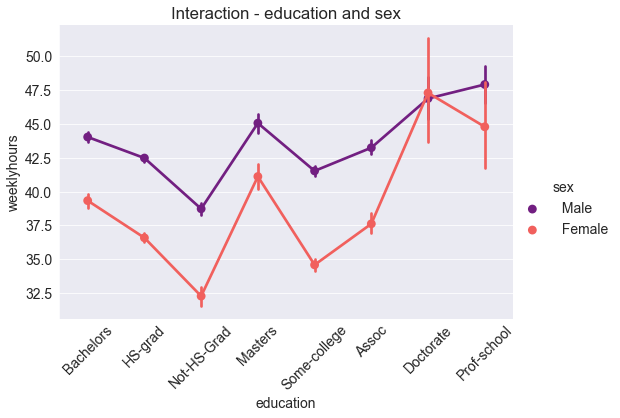

In [342]:
sns.catplot(x = 'education', y = 'weeklyhours', hue = 'sex', kind = 'point', data = data1, height=5, 
                    aspect=1.5, palette="magma")
plt.title('Interaction - education and sex')
plt.xticks(rotation=45)

# Linear Regression
## Sales people
## Regress on hours per week
### Question 6

In [343]:
factors6 = ['workclass', 'education', 'marital-status', 'relationship', 'race', 'sex', 'native-country', 'income']

In [344]:
data_p = pd.get_dummies(input_data, columns = factors6)
data_p.head()

,age,fnlwgt,education-num,occupation,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,sex_ Female,sex_ Male,native-country_Asia,native-country_Europe,native-country_North America,native-country_South,native-country_South America,native-country_Unknown,income_ <=50K,income_ >50K
0,39,77516,13,Adm-clerical,2174,0,40,0,0,0,...,0,1,0,0,1,0,0,0,1,0
1,50,83311,13,Exec-managerial,0,0,13,0,0,0,...,0,1,0,0,1,0,0,0,1,0
2,38,215646,9,Handlers-cleaners,0,0,40,0,0,0,...,0,1,0,0,1,0,0,0,1,0
3,53,234721,7,Handlers-cleaners,0,0,40,0,0,0,...,0,1,0,0,1,0,0,0,1,0
4,28,338409,13,Prof-specialty,0,0,40,0,0,0,...,1,0,0,0,1,0,0,0,1,0


In [345]:
data_p = data_p[data_p['occupation'] == 'Sales']
data_p = data_p.drop('occupation', axis=1)
data_p.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,sex_ Female,sex_ Male,native-country_Asia,native-country_Europe,native-country_North America,native-country_South,native-country_South America,native-country_Unknown,income_ <=50K,income_ >50K
13,32,205019,12,0,0,50,0,0,0,1,...,0,1,0,0,1,0,0,0,1,0
18,38,28887,7,0,0,50,0,0,0,1,...,0,1,0,0,1,0,0,0,1,0
31,20,266015,10,0,0,44,0,0,0,1,...,0,1,0,0,1,0,0,0,1,0
38,31,84154,10,0,0,38,0,0,0,1,...,0,1,0,0,0,0,0,1,0,1
60,30,59496,13,2407,0,40,0,0,0,1,...,0,1,0,0,1,0,0,0,1,0


In [346]:
drop_col6 = [ "workclass_Federal-gov", "education_Assoc", 
            "marital-status_Divorced", 
           "relationship_ Husband", "race_Black", "sex_ Female", 
            "native-country_Asia", "income_ <=50K"]

In [347]:
data6 = data_p.drop(drop_col6, axis=1)
data6.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,relationship_ Wife,race_Other,race_White,sex_ Male,native-country_Europe,native-country_North America,native-country_South,native-country_South America,native-country_Unknown,income_ >50K
13,32,205019,12,0,0,50,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
18,38,28887,7,0,0,50,0,0,1,0,...,0,0,1,1,0,1,0,0,0,0
31,20,266015,10,0,0,44,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
38,31,84154,10,0,0,38,0,0,1,0,...,0,0,1,1,0,0,0,0,1,1
60,30,59496,13,2407,0,40,0,0,1,0,...,0,0,1,1,0,1,0,0,0,0


In [348]:
X6 = data6.loc[:, data6.columns != 'hours-per-week']
Y6 = data6.loc[:, data6.columns == 'hours-per-week'] #regress on hoursperweek, full model

In [349]:
X6 = sm.add_constant(X6)
mod6 = sm.OLS(Y6, X6)
fit6 = mod6.fit()
p_values6 = fit6.summary2()
p_values6 #full model

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Ordinary least squares
=============================================================================
Model:                  OLS                 Adj. R-squared:        0.289     
Dependent Variable:     hours-per-week      AIC:                   28004.1166
Date:                   2020-01-16 23:44    BIC:                   28221.2035
No. Observations:       3650                Log-Likelihood:        -13967.   
Df Model:               34                  F-statistic:           44.61     
Df Residuals:           3615                Prob (F-statistic):    2.16e-245 
R-squared:              0.296               Scale:                 124.58    
-----------------------------------------------------------------------------
                              Coef.  Std.Err.    t    P>|t|   [0.025   0.975]
-----------------------------------------------------------------------------
const                        50.4896   6.4579  7.8183 0.0000  37.8281 63.1511
age                          -0.1193   0.0184 -6.4677 0.0000  -0.1554 -0.0831
fnlwgt                       -0.0000   0.0000 -0.5996 0.5488  -0.0000  0.0000
education-num                -0.5286   0.4136 -1.2778 0.2014  -1.3396  0.2824
capital-gain                  0.0001   0.0000  2.3317 0.0198   0.0000  0.0001
capital-loss                  0.0004   0.0004  0.8516 0.3945  -0.0005  0.0012
workclass_Local-gov          -4.2090   5.1891 -0.8111 0.4173 -14.3828  5.9648
workclass_Never-worked       -0.0000   0.0000 -1.8203 0.0688  -0.0000  0.0000
workclass_Private            -1.0968   3.0075 -0.3647 0.7154  -6.9934  4.7998
workclass_Self-emp-inc        4.1001   3.0704  1.3354 0.1818  -1.9197 10.1200
workclass_Self-emp-not-inc    1.9167   3.0556  0.6273 0.5305  -4.0741  7.9075
workclass_State-gov          -4.5789   4.5173 -1.0136 0.3108 -13.4356  4.2779
workclass_Unknown             0.0000   0.0000  1.8205 0.0688  -0.0000  0.0000
workclass_Without-pay        -0.0000   0.0000 -1.8203 0.0688  -0.0000  0.0000
education_Bachelors           1.3997   1.0086  1.3878 0.1653  -0.5777  3.3772
education_Doctorate           2.7514   4.4488  0.6185 0.5363  -5.9710 11.4739
education_HS-grad            -1.4888   1.3251 -1.1236 0.2613  -4.0868  1.1092
education_Masters             1.4581   1.5851  0.9199 0.3577  -1.6497  4.5658
education_Not-HS-Grad        -8.9009   2.4257 -3.6694 0.0002 -13.6569 -4.1450
education_Prof-school         0.5883   3.0875  0.1906 0.8489  -5.4650  6.6417
education_Some-college       -1.9386   1.0346 -1.8738 0.0610  -3.9670  0.0898
marital-status_Married       -1.8185   1.5399 -1.1809 0.2377  -4.8376  1.2007
marital-status_Never-married -4.2742   0.6925 -6.1719 0.0000  -5.6320 -2.9164
marital-status_Widowed       -3.8277   1.2435 -3.0781 0.0021  -6.2658 -1.3896
relationship_ Not-in-family   0.3425   1.5335  0.2234 0.8233  -2.6641  3.3492
relationship_ Other-relative -3.6829   1.7438 -2.1120 0.0348  -7.1017 -0.2640
relationship_ Own-child      -9.0028   1.5608 -5.7681 0.0000 -12.0629 -5.9427
relationship_ Unmarried      -0.9158   1.6516 -0.5545 0.5793  -4.1540  2.3224
relationship_ Wife           -2.3637   1.1497 -2.0559 0.0399  -4.6178 -0.1096
race_Other                    2.9762   1.3545  2.1972 0.0281   0.3204  5.6319
race_White                    0.7362   0.7584  0.9708 0.3317  -0.7507  2.2230
sex_ Male                     5.4247   0.5277 10.2803 0.0000   4.3901  6.4593
native-country_Europe         3.6174   2.5607  1.4127 0.1578  -1.4032  8.6381
native-country_North America  1.3252   1.7501  0.7572 0.4490  -2.1060  4.7564
native-country_South          3.6374   2.9640  1.2272 0.2198  -2.1740  9.4487
native-country_South America  0.4786   3.7839  0.1265 0.8993  -6.9401  7.8974
native-country_Unknown        1.6100   2.1291  0.7562 0.4496  -2.5644  5.7843
income_ >50K                  3.3355   0.5187  6.4305 0.0000   2.3185  4.3524
--------------------------------------------------------------------------

In [350]:
col1 = []
for i in range(len(X1.columns)):
    res = re.search("nativ.*",X1.columns[i])
    if res != None:
        col1.append(str(res[0]))

In [351]:
drop_col6r = [ "fnlwgt", "education-num", "capital-loss", "workclass_Federal-gov", "education_Assoc", "marital-status_Divorced", 
           "relationship_ Husband", "race_Black", "sex_ Female", "native-country_Asia", "income_ <=50K"]

for i in range(len(col1)):
    drop_col6r.append(col1[i])

In [352]:
data6r = data_p.drop(drop_col6r, axis=1)

In [353]:
X6r = data6r.loc[:, data6r.columns != 'hours-per-week']
Y6r = data6r.loc[:, data6r.columns == 'hours-per-week'] 

In [354]:
X6r.columns

Index(['age', 'capital-gain', 'workclass_Local-gov', 'workclass_Never-worked',
       'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Unknown', 'workclass_Without-pay', 'education_Bachelors',
       'education_Doctorate', 'education_HS-grad', 'education_Masters',
       'education_Not-HS-Grad', 'education_Prof-school',
       'education_Some-college', 'marital-status_Married',
       'marital-status_Never-married', 'marital-status_Widowed',
       'relationship_ Not-in-family', 'relationship_ Other-relative',
       'relationship_ Own-child', 'relationship_ Unmarried',
       'relationship_ Wife', 'race_Other', 'race_White', 'sex_ Male',
       'income_ >50K'],
      dtype='object')

In [355]:
X6r = sm.add_constant(X6r)

In [356]:
mod6r = sm.OLS(Y6r,X6r)
fit6r = mod6r.fit()
p_values6r = fit6r.summary2()
p_values6r 
#reduce model has the same adjusted r squareas the full model. But the BIC and AIC are improved with the reduced model.

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Ordinary least squares
=============================================================================
Model:                  OLS                 Adj. R-squared:        0.289     
Dependent Variable:     hours-per-week      AIC:                   27994.1686
Date:                   2020-01-16 23:44    BIC:                   28161.6356
No. Observations:       3650                Log-Likelihood:        -13970.   
Df Model:               26                  F-statistic:           58.14     
Df Residuals:           3623                Prob (F-statistic):    5.42e-251 
R-squared:              0.294               Scale:                 124.51    
-----------------------------------------------------------------------------
                              Coef.  Std.Err.    t    P>|t|   [0.025   0.975]
-----------------------------------------------------------------------------
const                        45.5094   3.6475 12.4768 0.0000  38.3580 52.6607
age                          -0.1162   0.0183 -6.3365 0.0000  -0.1522 -0.0802
capital-gain                  0.0000   0.0000  2.2413 0.0251   0.0000  0.0001
workclass_Local-gov          -4.7094   5.1808 -0.9090 0.3634 -14.8671  5.4482
workclass_Never-worked        0.0000   0.0000  0.0223 0.9822  -0.0000  0.0000
workclass_Private            -1.2672   3.0027 -0.4220 0.6730  -7.1543  4.6200
workclass_Self-emp-inc        3.9701   3.0657  1.2950 0.1954  -2.0406  9.9809
workclass_Self-emp-not-inc    1.8061   3.0504  0.5921 0.5538  -4.1745  7.7867
workclass_State-gov          -4.7136   4.5115 -1.0448 0.2962 -13.5589  4.1317
workclass_Unknown             0.0000   0.0000  0.0217 0.9827  -0.0000  0.0000
workclass_Without-pay         0.0000   0.0000  0.0132 0.9895  -0.0000  0.0000
education_Bachelors           0.6233   0.8175  0.7625 0.4458  -0.9795  2.2261
education_Doctorate           0.4518   4.0335  0.1120 0.9108  -7.4564  8.3600
education_HS-grad            -0.1455   0.7893 -0.1843 0.8538  -1.6929  1.4020
education_Masters             0.0868   1.2133  0.0715 0.9430  -2.2920  2.4656
education_Not-HS-Grad        -6.0887   0.9459 -6.4371 0.0000  -7.9432 -4.2342
education_Prof-school        -1.2024   2.7354 -0.4396 0.6603  -6.5655  4.1607
education_Some-college       -1.1268   0.7949 -1.4175 0.1564  -2.6853  0.4318
marital-status_Married       -1.7830   1.5353 -1.1614 0.2456  -4.7932  1.2271
marital-status_Never-married -4.2649   0.6917 -6.1661 0.0000  -5.6209 -2.9088
marital-status_Widowed       -3.8619   1.2429 -3.1072 0.0019  -6.2987 -1.4251
relationship_ Not-in-family   0.3473   1.5298  0.2270 0.8204  -2.6520  3.3465
relationship_ Other-relative -3.5205   1.7378 -2.0258 0.0429  -6.9277 -0.1132
relationship_ Own-child      -9.0541   1.5567 -5.8164 0.0000 -12.1061 -6.0021
relationship_ Unmarried      -0.8586   1.6463 -0.5215 0.6020  -4.0864  2.3692
relationship_ Wife           -2.3610   1.1471 -2.0582 0.0396  -4.6101 -0.1119
race_Other                    3.0155   1.1436  2.6368 0.0084   0.7733  5.2577
race_White                    0.8305   0.7513  1.1054 0.2691  -0.6425  2.3034
sex_ Male                     5.4095   0.5248 10.3077 0.0000   4.3805  6.4384
income_ >50K                  3.3580   0.5136  6.5387 0.0000   2.3511  4.3649
-----------------------------------------------------------------------------
Omnibus:              159.733       Durbin-Watson:          1.964            
Prob(Omnibus):        0.000         Jarque-Bera (JB):       485.329          
Skew:                 0.130         Prob(JB):               0.000            
Kurtosis:             4.767         Condition No.:          10128873742582896
=============================================================================
* The condition number is large (1e+16). This might indicate
strong multicollinearity or other numerical problems.
"""